## Several fits

## General

In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Linear

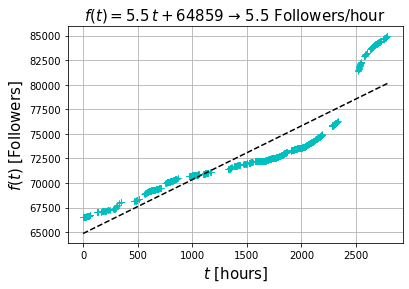

In [45]:
def line(x,m,b):
    return m*x+b

df=pd.read_json('followers.json')
df=df.iloc[-1500:].reset_index(drop=True)
#df=df[-20:].reset_index(drop=True)

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
#df=df[df['hours']>850].reset_index(drop=True)

plt.plot(df['hours'],df['followers'],'c+')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t+%s$ → %s Followers/hour' %(round(m,1),int(b),round(m,1)),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [46]:
df['Δf']=[0]+list(df.followers.values[1:]-df.followers.values[:-1])
df.iloc[-20:]#[-24*1:]#['Δf'].sum()

,followers,date_time,hours,Δf
1480,84788,2022-06-18 14:30:35.743,2768.493019,6
1481,84807,2022-06-18 15:30:39.568,2769.494082,19
1482,84815,2022-06-18 16:30:44.147,2770.495354,8
1483,84820,2022-06-18 17:30:49.446,2771.496826,5
1484,84829,2022-06-18 18:30:53.263,2772.497886,9
1485,84842,2022-06-18 19:30:58.717,2773.499401,13
1486,84851,2022-06-18 20:31:01.505,2774.500176,9
1487,84866,2022-06-18 21:31:05.284,2775.501225,15
1488,84877,2022-06-18 22:31:09.288,2776.502338,11
1489,84893,2022-06-18 23:31:12.142,2777.503130,16


In [47]:
df.Δf.min()

-35

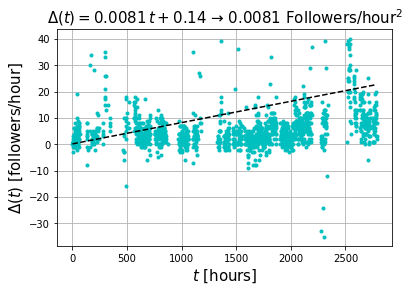

In [48]:
t=np.linspace(0,900)
dfl=df[df['Δf']<41]
plt.plot(dfl['hours'],dfl['Δf'],'c.')
ll,lle=optimize.curve_fit(line,df['hours'],df['Δf'],p0=[-0.1,15])
ml,bl=ll
plt.plot(df['hours'],line(df['hours'],ml,bl),linestyle='--',color='k')
#plt.plot(t,-0.01*t+10)
plt.title('$\Delta(t)=%s\\,t+%s$ → %s Followers/hour${}^2$' %(round(ml,4),round(bl,2),round(ml,4)),fontsize=15)
plt.ylabel('$\Delta(t)$ [followers/hour]',size=15)
plt.xlabel('$t$ [hours]',size=15)
plt.grid()

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [17]:
def hours(y,m,b):
    return (y-b)/m

In [18]:
y=90000
h=int(round(hours(y,m,b),0))
h

7281

In [19]:
import datetime

In [20]:
t0=df.loc[0,'date_time']
print(f't0 → {t0}')
print(f'{t0+datetime.timedelta(hours=h)}')

t0 → 2021-12-29 20:59:26.236000
2022-10-29 05:59:26.236000


In [21]:
df['pred']=df['hours'].apply(lambda x: int(m*x+b)) 

Errores

In [22]:
Δm=np.sqrt(le[0,0])
Δb=np.sqrt(le[1,1])

In [23]:
m-Δm,m+Δm

(3.907829150300555, 3.9205938376582368)

In [24]:
b-Δb,b+Δb

(61492.02430773689, 61508.57795943795)

In [25]:
df.iloc[-1]['hours']+10*24

2700.2087483333216

## Cuadratic

In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


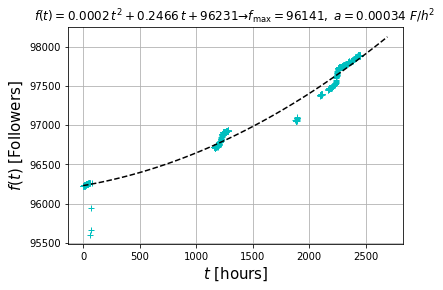

In [2]:
import pandas as pd
def curve(x,a,b,c):
    return a*x**2+b*x+c

df=pd.read_json('followers.json')
df=df.iloc[-500:].reset_index(drop=True)
#df=df.iloc[-1200:].reset_index(drop=True)
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'c+')


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])
a,b,c=l


#Fit:
p=np.poly1d([a,b,c])
v=p.deriv()
tmax=v.roots[0]
t=np.linspace(0,df.iloc[-1]['hours']+10*24)


plt.plot(t,curve(t,a,b,c),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t^2+%s\\,t+%s \\to f_{\\rm{max}}=%s,\\ a=%s\\ F/h^2$ ' 
          %(round(a,4),round(b,4),int(c),int(p(tmax)),2*round(a,5)),fontsize=12)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
#plt.hlines(62000,-100,4000)
plt.savefig('followers.png')
#plt.xlim(3000,4500)
#plt.ylim(60000,64000)

In [3]:
import numbers
import datetime

In [20]:
pred=100000
PREDICTION=isinstance( (pred-p).roots[-1],numbers.Real )

In [21]:
fmax=float('inf')
if p.coefficients[0]<0:
    fmax=p(tmax)

In [22]:
v(df.hours.iloc[0:df.shape[0]:df.shape[0]//2])

array([0.24663536, 0.98587034])

In [23]:
#v(df.hours.iloc[0:df.shape[0]])

Prediction:
$$F(t)=\frac{1}{2}at^2+v_0t+t_0$$

In [24]:
if PREDICTION:
    h=(pred-p).roots[-1]
    t0=df.loc[0,'date_time']
    print(f't0 → {t0}, t_end → {h}')
    print(f'{pred} folowers → {t0+datetime.timedelta(hours=h)}')
else:
    t=df.loc[0,'date_time']    
    print(f'{fmax} max followers → {t+datetime.timedelta(hours=tmax)}')

t0 → 2022-10-28 22:18:02.176000, t_end → 4044.0317041899457
100000 folowers → 2023-04-15 10:19:56.311084


In [11]:
pred=96000
h=(pred-p).roots[-1]
t0=df.loc[0,'date_time']
print(f't0 → {t0}, t_end → {h}')
print(f'{pred} folowers → {t0+datetime.timedelta(hours=h)}')

t0 → 2021-08-04 22:06:53.668000, t_end → 9963.272279332376
96000 folowers → 2022-09-24 01:23:13.873597


In [ ]:
ggkkj

## Logistic

\begin{align}
f(x; \mu,s)  & = \frac{e^{-(x-\mu)/s}} {s\left(1+e^{-(x-\mu)/s}\right)^2} \\[4pt]
& =\frac{1}{s\left(e^{(x-\mu)/(2s)}+e^{-(x-\mu)/(2s)}\right)^2} \\[4pt]
& =\frac{1}{4s} \operatorname{sech}^2\left(\frac{x-\mu}{2s}\right).
\end{align}

In [78]:
from scipy import  misc
def logistic(x,A,μ,s):
    return A*np.exp( -(x-μ)/s  )/( s*(1 + np.exp( -(x-μ)/s  )   )  )**2

derivative=np.vectorize(misc.derivative)

df=pd.read_json('followers.json')

df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


t=np.linspace(0,5000,1000)
p0=[20000,100,10]
l,le=optimize.curve_fit(logistic,df['hours'],df['followers'],p0=p0)
A,μ,s=l
l

array([2.93283857e+12, 4.30174009e+03, 3.42131016e+03])

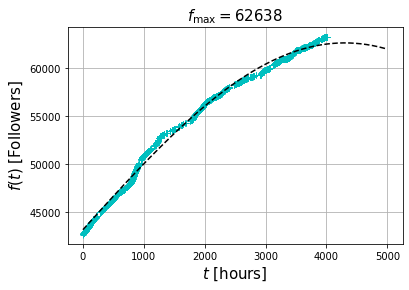

In [79]:
#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
plt.plot(df['hours'],df['followers'],'c+')

#fmax
dlogistic=derivative(lambda t: logistic(t,A,μ,s),t)
nt=dlogistic[dlogistic>0].shape[0]
lfmax=logistic( t[nt],A,μ,s ) 

#Fit:
plt.plot(t,logistic(t,A,μ,s),linestyle='--',color='k')
plt.title(r'$f_{\rm max}=%s$' %int(lfmax),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [80]:
optimize.curve_fit(logistic,df['hours'],df['followers'],p0=[100,1,1])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.19682098e+12, 3.65612497e+03, 3.00886344e+03]),
 array([[1.94873469e+20, 1.63719228e+11, 1.23457036e+11],
        [1.63719228e+11, 1.42640640e+02, 1.02932126e+02],
        [1.23457036e+11, 1.02932126e+02, 7.83832268e+01]]))

In [81]:
t[nt]/24

152.4441107774441

In [170]:
import helium as hell
import pandas as pd
import time

In [26]:
df['followers'].sort_values().unique()

array([42696, 42706, 42716, ..., 56979, 56980, 56983])

In [28]:
pd.__version__

'1.3.0'

In [ ]:
import itertools
import math as mh

def remove_double_intersection_pairs(msvp,l):
    for p in msvp.copy():
        tmp=msvp.copy()
        tmp.remove(p)
        fltmp=set([x for sublist in tmp for x in sublist]) 
        if l.count(p[0])==1 and l.count(p[1])==1 and set(p).issubset(fltmp):
            msvp=tmp.copy()
    return msvp
assert len(remove_double_intersection_pairs([(-10, 11), (-12, 13), (11, -12)],
                                             [-10, 11, -12, 13]))==2
assert len(remove_double_intersection_pairs([(4,4),(4,-12)],[4,-12]))==1

def get_real_massless(l,msvp):
    lp=l.copy()
    for x,y in msvp:
        #print(lp,msvp,x,y)
        if lp and x in lp and y in lp:
            minxy=min(lp.count(x),lp.count(y))
            if x!=y:
                [(lp.remove(x),lp.remove(y)) for ii in range(minxy)]
            else:
                [ lp.remove(x) for ii in range(lp.count(x)) ] # abs(2*x)==s
        else: # not lp
            break
    return lp

def get_hidden_sector(l):
    '''
    Extract massive pairs without massles fermions from l
        [1, 3, 4, 6, -7, -8, -13, 14] → [[3,4],[6,-13],[1,6],[-7,14],[1,-8]]
        #Remove [1,6] because is already in the pairs list
        [1, 3, 4, 6, -7, -8, -13, 14] → [[3,4],[6,-13],[-7,14],[1,-8]]
        [1, 6, -7, -8, -13, 14] → [[6,-13],[-7,14],[1,-8]]
        [1, -7, -8, 14] → [[-7,14],[1,-8]]
        [1, -8] → [[1,-8]]
        [] → []    
    '''
    sltns=[]
    ps = list(set(itertools.combinations_with_replacement(l,2)))
    Ss = set(abs(sum(x)) for x in ps)
    for s in Ss:
        msv = [p for p in ps if abs(sum(p))==s]
        lmsv=[x for sublist in msv for x in sublist]
        massives=set(lmsv)        
        massless=set(l).difference(massives)
        if not massless:
            # ========= Quality check =======================
            # Check that all the elements of l can be removed
            for INTERSECTIONS in [False,True]:
                msvp=msv.copy()
                lp=l.copy()
                if INTERSECTIONS:
                    msvp = remove_double_intersection_pairs(msvp,l)
                for msvp in itertools.permutations(msvp.copy()):
                    msvp=list(msvp)
                    lp=get_real_massless(l,msvp)
                    if not lp:
                        break #found real massless
                if not lp: # double break for INTERSECTIONS
                    break # found real massless
                    
            if lp:
                continue # Not a hidden sector
            # =================================
            sltn={}
            sltn['S']=s
            #Save storage
            sltn['ψ']=msv
            sltns.append(sltn)
    return sltns

assert get_hidden_sector([1,2,-3,4,5])[0].get('S')==6
assert get_hidden_sector([1,2,-3,-3,4,5])[0].get('S')==6
assert get_hidden_sector([1,1,2,-3,-3,4,5,5])[0].get('S')==6
#aψ1ψ1+bψ1ψ2+cψ1,ψ3 → https://www.wolframalpha.com/input?i=Rank%20{{a,b,c},{b,0,0},{c,0,0}}
assert get_hidden_sector([1,2,-3,4,5,9,9])==[]
get_hidden_sector([1,1,2,-3,4,5])
#aψ1ψ2+bψ1ψ3 → https://www.wolframalpha.com/input?i=rank+{{0,a,b},{a,0,0},{b,0,0}}
assert get_hidden_sector([1,1,2,-3,4,5])==[]
assert get_hidden_sector([1,1,2,-3,-3,4,5])==[]
assert get_hidden_sector([1,2,-3,4,5,8])==[]
assert get_hidden_sector([1,2,-3,4,5,8,8])==[]
assert get_hidden_sector([])==[]
assert get_hidden_sector([1, 1, 1, 1, 1, -2, -2, -2, -2, 3])==[]
assert get_hidden_sector([1, 2, 2, 2, -3, -5, -6, 7])[0].get('S')==4
assert get_hidden_sector( [1, 2, 2, 4, -5, -5, -7, 8] )[0].get('S')==3
assert get_hidden_sector([2, -3, -4, 5, -6, 7, 7, -8])[0].get('S')==1 # Ana test
assert get_hidden_sector([3, 5, -8, 9, -10, -14, 15])==[] # Dirac triplet [-10,5,15] (s=5)
assert get_hidden_sector([3, 5, -8, 9, -10, -14, 15, 20,-30, 35])==[]
assert get_hidden_sector([1, 3, 3, 3, -5, -7, -7, 9])[0].get('S')==4 #order of pairs matters
assert get_hidden_sector([7, -8, -10, 11, -12, 13, 14, -15])[0].get('S')==1 #double intersection pair
assert get_hidden_sector([4,-12])[0].get('S')==8